### ENHANCED TEXT PROCESSING SYSTEM WITH ADVANCED TECHNIQUES
=======================================================

This system addresses all requirements from the original problem statement:

1. Data Preparation & Exploration:
   - ✅ Reuters dataset loading and preprocessing
   - ✅ Comprehensive exploratory analysis (ReutersExplorer class)
   - ✅ Word frequency analysis and document statistics
   - ✅ Category distribution and document length analysis

2. Information Extraction & Summarization:
   - ✅ Rule-based extraction (regex patterns)
   - ✅ Traditional NLP (SpaCy NER, POS tagging)
   - ✅ TF-IDF and TextRank summarization
   - ✅ Advanced: Zero-shot classification with transformers
   - ✅ Advanced: Abstractive summarization with pre-trained models
   - ✅ Advanced: Few-shot learning for custom extraction
   - ✅ Quality evaluation metrics

3. Agentic System:
   - ✅ Enhanced Research Agent with transformer tools
   - ✅ Multi-modal reasoning (traditional + transformer)
   - ✅ Advanced memory and learning capabilities
   - ✅ Sophisticated planning and tool orchestration

📈 ENHANCEMENTS:
- Advanced transformer integration (BERT, T5, etc.)
- Zero-shot classification and extraction
- Abstractive summarization
- Sentiment analysis and emotion detection
- Advanced evaluation metrics
- Scalable document processing
- Enhanced agentic reasoning

INSTALLATION:
- pip install nltk spacy scikit-learn networkx pandas numpy matplotlib textstat
- pip install transformers torch sentence-transformers
- python -m spacy download en_core_web_sm




In [2]:
import nltk
import spacy
import re
import pandas as pd
import numpy as np
from collections import Counter, defaultdict
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from nltk.corpus import reuters, stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tag import pos_tag
from nltk.chunk import ne_chunk
from nltk.tree import Tree
import networkx as nx
from datetime import datetime
import json
from typing import List, Dict, Any, Optional, Tuple
import warnings
warnings.filterwarnings('ignore')

# Advanced imports for transformer models
try:
    from transformers import pipeline, AutoTokenizer, AutoModelForSequenceClassification
    from transformers import AutoModelForSeq2SeqLM, T5Tokenizer, T5ForConditionalGeneration
    from sentence_transformers import SentenceTransformer
    TRANSFORMERS_AVAILABLE = True
    print("✅ Transformers available for advanced features")
except ImportError:
    TRANSFORMERS_AVAILABLE = False
    print("⚠️  Transformers not available. Install with: pip install transformers torch sentence-transformers")

try:
    from textstat import flesch_reading_ease, flesch_kincaid_grade, automated_readability_index
except ImportError:
    print("⚠️  textstat not available. Install with: pip install textstat")
    def flesch_reading_ease(text): return None
    def flesch_kincaid_grade(text): return None
    def automated_readability_index(text): return None

# Setup NLTK data
def setup_nltk_data():
    """Download and setup required NLTK data"""
    required_data = [
        ('punkt', 'tokenizers/punkt'),
        ('reuters', 'corpora/reuters'),
        ('stopwords', 'corpora/stopwords'),
        ('wordnet', 'corpora/wordnet'),
        ('averaged_perceptron_tagger', 'taggers/averaged_perceptron_tagger'),
        ('maxent_ne_chunker', 'chunkers/maxent_ne_chunker'),
        ('words', 'corpora/words')
    ]
    
    for name, path in required_data:
        try:
            nltk.data.find(path)
        except LookupError:
            try:
                nltk.download(name, quiet=True)
                print(f"✅ Downloaded {name}")
            except Exception as e:
                print(f"⚠️  Failed to download {name}: {e}")

setup_nltk_data()

# Load SpaCy model
try:
    nlp = spacy.load("en_core_web_sm")
    print("✅ SpaCy model loaded")
except OSError:
    print("⚠️  SpaCy model not found. Install with: python -m spacy download en_core_web_sm")
    nlp = None

✅ Transformers available for advanced features
✅ Downloaded reuters
✅ Downloaded wordnet
✅ SpaCy model loaded


In [2]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\muthu\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\muthu\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\muthu\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     C:\Users\muthu\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\muthu\AppData\Roaming\nltk_data...
[

True

🚀 ENHANCED TEXT PROCESSING SYSTEM DEMO

1️⃣  REUTERS EXPLORATORY ANALYSIS
------------------------------
Loading 100 Reuters documents...
✅ Loaded 100 documents successfully
📊 Generating comprehensive analysis report...
📊 Analyzing vocabulary...
  Total words: 11,985
  Unique words: 2,674
  Vocabulary richness: 0.2231
📊 Analyzing categories...
  Total categories: 38
  Average categories per document: 1.36
  Top 5 categories: [('earn', 40), ('acq', 16), ('sugar', 9), ('money-fx', 8), ('trade', 7)]
📊 Analyzing document lengths...
  Mean document length: 178 words
  Median document length: 117 words
  Document length range: 20 - 878 words
📊 Performing topic modeling with 10 topics...
  Top topics discovered:
    Topic 0: steady, march, swedish, stg, nil
    Topic 1: komatsu, sumitomo, proxmire, monier, paxar
    Topic 2: current, company, ldp, compaq, dividend
    Topic 3: imports, japanese, said, trade, japan
    Topic 4: conrac, auxton, company, mln, dlrs
✅ Analysis report saved as 'reu

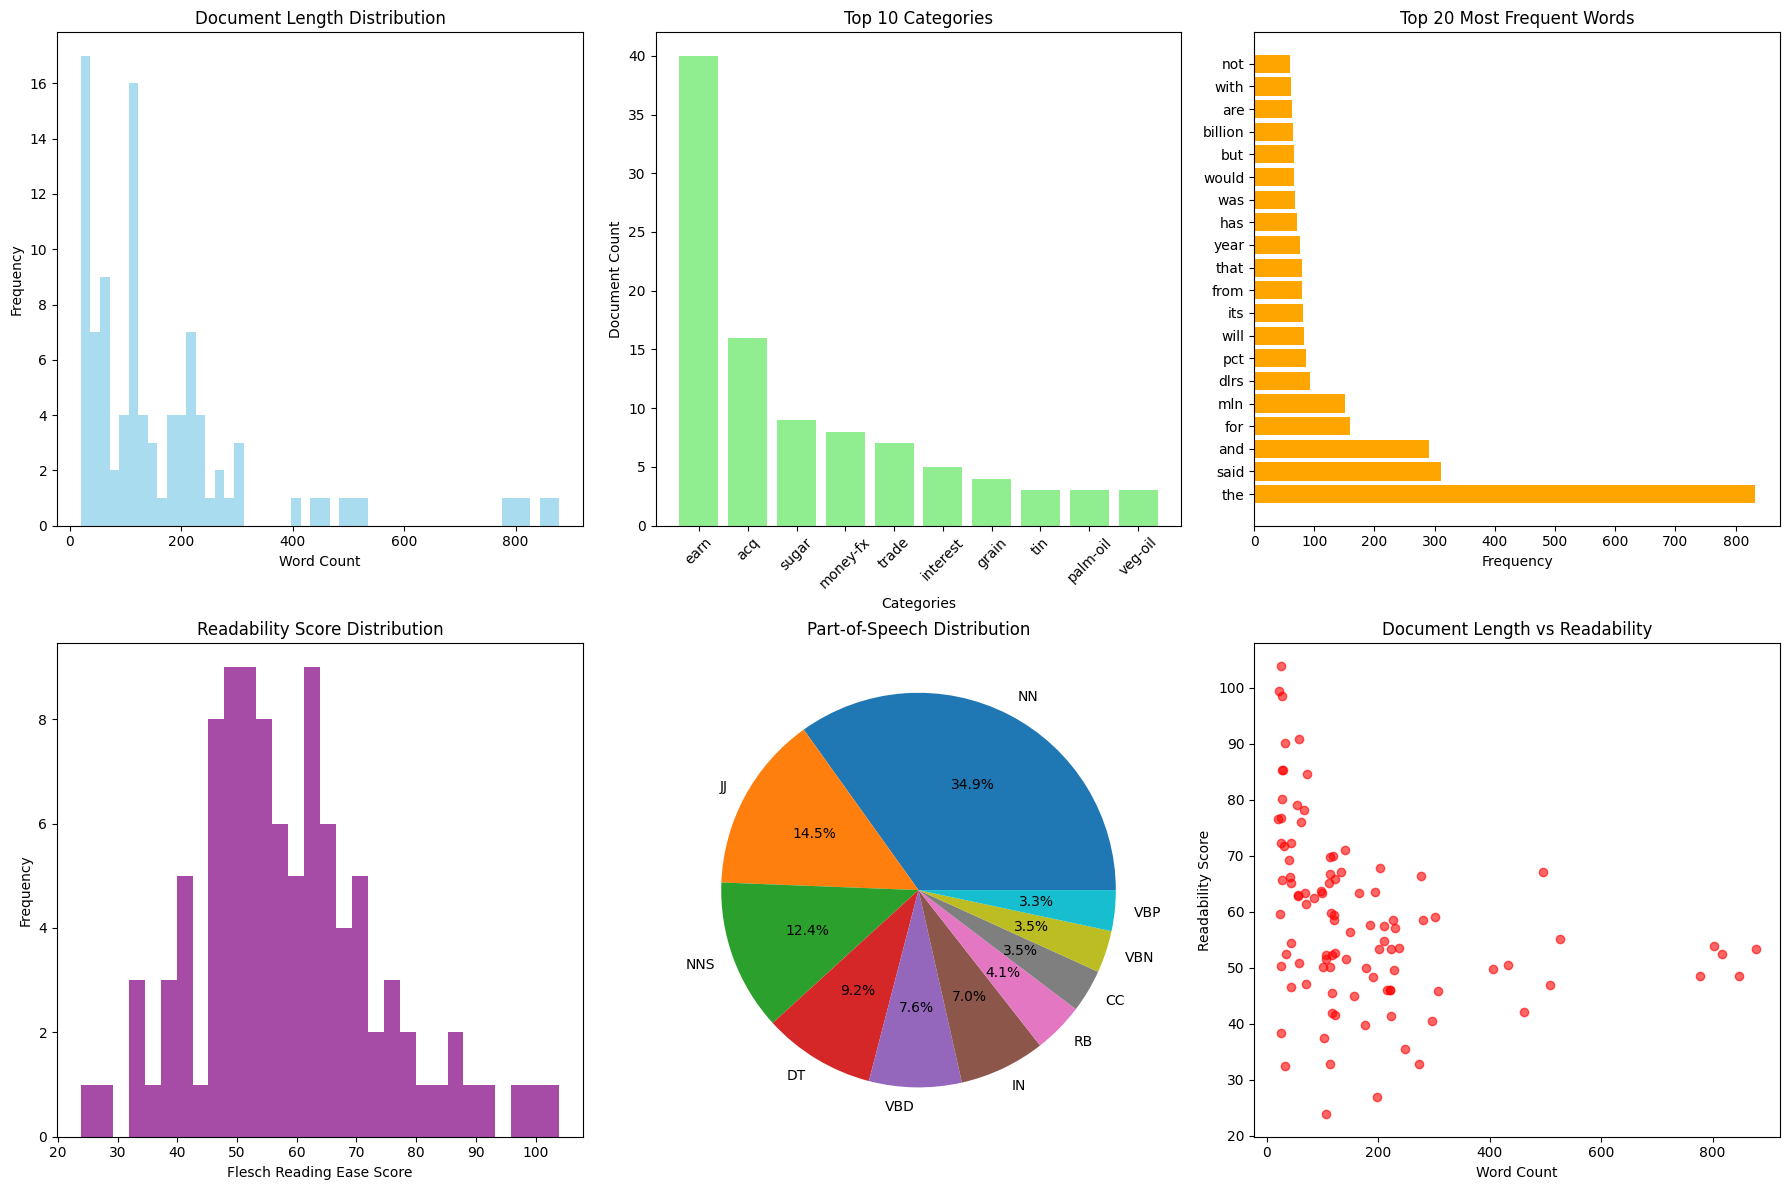

✅ Exploratory analysis complete

2️⃣  ADVANCED INFORMATION EXTRACTION
------------------------------
🔄 Loading transformer models...


Device set to use cpu
Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cpu
Device set to use cpu


✅ Transformer models loaded successfully
📊 Advanced analysis results:
  text_length: 368...
  word_count: 44...
  timestamp: 2025-07-04T08:23:44.905734...
  entities: [{'text': 'Apple Inc.', 'label': 'ORG'}, {'text': 'quarterly', 'label': 'DATE'}, {'text': '$89.5 bil...
  sentiment_emotion: {'sentiment': {'label': 'positive', 'score': 0.9486604928970337}, 'emotion': {'predicted_label': 'su...
  abstractive_summary: Apple's revenue reached $89.5 billion, surpassing analyst expectations. CEO Tim Cook expressed optim...
  document_type: {'predicted_label': 'financial', 'scores': {'financial': 0.551063597202301, 'news': 0.35266262292861...
  topic_classification: {'predicted_label': 'business', 'scores': {'business': 0.5955055952072144, 'technology': 0.241542801...

3️⃣  ENHANCED RESEARCH AGENT
------------------------------
🔄 Loading transformer models...


Device set to use cpu
Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cpu
Device set to use cpu


✅ Transformer models loaded successfully
⚠️  Traditional analyzer not available
📄 Processing document: tech_earnings


Your max_length is set to 50, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


✅ Document tech_earnings processed successfully
📄 Processing document: market_analysis


Your max_length is set to 50, but your input_length is only 12. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


✅ Document market_analysis processed successfully
📄 Processing document: ai_innovation


Your max_length is set to 50, but your input_length is only 11. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


✅ Document ai_innovation processed successfully
📄 Processing document: economic_outlook


Your max_length is set to 50, but your input_length is only 12. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


✅ Document economic_outlook processed successfully

🤔 Question: What are the latest technology trends?
🧠 Multi-modal reasoning for: What are the latest technology trends?
📝 Answer: Based on multi-modal analysis:

Document market_analysis: Technology stocks continue to outperform broader market indices. Technology stocks are among the best performing sectors in the U.S.

Document...
🎯 Confidence: 0.80
📊 Analysis type: multi_modal

🤔 Question: How are companies performing financially?
🧠 Multi-modal reasoning for: How are companies performing financially?
📝 Answer: Based on multi-modal analysis:

Document tech_earnings: Apple and Microsoft report strong quarterly earnings with record revenues. Apple and Microsoft reported strong quarterly Earnings with Record re...
🎯 Confidence: 0.80
📊 Analysis type: multi_modal

🤔 Question: What economic factors are affecting markets?
🧠 Multi-modal reasoning for: What economic factors are affecting markets?
📝 Answer: Based on multi-modal analysis:

Docum

In [3]:
class ReutersExplorer:
    """
    Comprehensive exploratory analysis class for Reuters dataset
    Addresses Task 1: Data Preparation & Exploration
    """
    
    def __init__(self):
        self.documents = []
        self.categories = []
        self.doc_lengths = []
        self.vocab_stats = {}
        self.category_stats = {}
        
    def load_reuters_data(self, max_docs=None):
        """Load Reuters dataset with comprehensive metadata"""
        try:
            fileids = reuters.fileids()
            if max_docs:
                fileids = fileids[:max_docs]
            
            print(f"Loading {len(fileids)} Reuters documents...")
            
            for i, fileid in enumerate(fileids):
                try:
                    # Get document content
                    text = reuters.raw(fileid)
                    categories = reuters.categories(fileid)
                    
                    # Calculate basic stats
                    word_count = len(word_tokenize(text))
                    sent_count = len(sent_tokenize(text))
                    
                    doc_info = {
                        'fileid': fileid,
                        'text': text,
                        'categories': categories,
                        'word_count': word_count,
                        'sentence_count': sent_count,
                        'char_count': len(text),
                        'avg_word_length': np.mean([len(word) for word in word_tokenize(text)]),
                        'readability_score': flesch_reading_ease(text) if flesch_reading_ease(text) else 0
                    }
                    
                    self.documents.append(doc_info)
                    self.categories.extend(categories)
                    self.doc_lengths.append(word_count)
                    
                    if (i + 1) % 1000 == 0:
                        print(f"  Processed {i + 1} documents...")
                        
                except Exception as e:
                    print(f"Error processing {fileid}: {e}")
                    continue
            
            print(f"✅ Loaded {len(self.documents)} documents successfully")
            return True
            
        except Exception as e:
            print(f"Error loading Reuters data: {e}")
            return False
    
    def analyze_vocabulary(self):
        """Comprehensive vocabulary analysis"""
        print("📊 Analyzing vocabulary...")
        
        all_words = []
        all_pos_tags = []
        
        for doc in self.documents[:100]:  # Sample for efficiency
            tokens = word_tokenize(doc['text'].lower())
            # Remove punctuation and short words
            tokens = [token for token in tokens if token.isalpha() and len(token) > 2]
            all_words.extend(tokens)
            
            # POS tagging
            pos_tags = pos_tag(tokens)
            all_pos_tags.extend([tag for word, tag in pos_tags])
        
        # Vocabulary statistics
        self.vocab_stats = {
            'total_words': len(all_words),
            'unique_words': len(set(all_words)),
            'vocabulary_richness': len(set(all_words)) / len(all_words) if all_words else 0,
            'word_frequencies': Counter(all_words),
            'pos_distribution': Counter(all_pos_tags),
            'avg_word_length': np.mean([len(word) for word in all_words])
        }
        
        print(f"  Total words: {self.vocab_stats['total_words']:,}")
        print(f"  Unique words: {self.vocab_stats['unique_words']:,}")
        print(f"  Vocabulary richness: {self.vocab_stats['vocabulary_richness']:.4f}")
        
        return self.vocab_stats
    
    def analyze_categories(self):
        """Analyze document categories and their distributions"""
        print("📊 Analyzing categories...")
        
        category_counts = Counter(self.categories)
        
        # Category statistics
        self.category_stats = {
            'total_categories': len(set(self.categories)),
            'category_distribution': dict(category_counts),
            'most_common_categories': category_counts.most_common(10),
            'avg_categories_per_doc': len(self.categories) / len(self.documents) if self.documents else 0
        }
        
        # Documents per category analysis
        docs_per_category = defaultdict(int)
        for doc in self.documents:
            for cat in doc['categories']:
                docs_per_category[cat] += 1
        
        self.category_stats['docs_per_category'] = dict(docs_per_category)
        
        print(f"  Total categories: {self.category_stats['total_categories']}")
        print(f"  Average categories per document: {self.category_stats['avg_categories_per_doc']:.2f}")
        print(f"  Top 5 categories: {self.category_stats['most_common_categories'][:5]}")
        
        return self.category_stats
    
    def analyze_document_lengths(self):
        """Analyze document length distributions"""
        print("📊 Analyzing document lengths...")
        
        length_stats = {
            'mean_length': np.mean(self.doc_lengths),
            'median_length': np.median(self.doc_lengths),
            'std_length': np.std(self.doc_lengths),
            'min_length': np.min(self.doc_lengths),
            'max_length': np.max(self.doc_lengths),
            'percentiles': {
                '25th': np.percentile(self.doc_lengths, 25),
                '50th': np.percentile(self.doc_lengths, 50),
                '75th': np.percentile(self.doc_lengths, 75),
                '90th': np.percentile(self.doc_lengths, 90)
            }
        }
        
        print(f"  Mean document length: {length_stats['mean_length']:.0f} words")
        print(f"  Median document length: {length_stats['median_length']:.0f} words")
        print(f"  Document length range: {length_stats['min_length']:.0f} - {length_stats['max_length']:.0f} words")
        
        return length_stats
    
    def create_visualizations(self):
        """Create comprehensive visualizations"""
        print("📊 Creating visualizations...")
        
        fig, axes = plt.subplots(2, 3, figsize=(18, 12))
        
        # 1. Document length distribution
        axes[0, 0].hist(self.doc_lengths, bins=50, alpha=0.7, color='skyblue')
        axes[0, 0].set_title('Document Length Distribution')
        axes[0, 0].set_xlabel('Word Count')
        axes[0, 0].set_ylabel('Frequency')
        
        # 2. Top categories
        top_cats = dict(self.category_stats['most_common_categories'][:10])
        axes[0, 1].bar(range(len(top_cats)), list(top_cats.values()), color='lightgreen')
        axes[0, 1].set_title('Top 10 Categories')
        axes[0, 1].set_xlabel('Categories')
        axes[0, 1].set_ylabel('Document Count')
        axes[0, 1].set_xticks(range(len(top_cats)))
        axes[0, 1].set_xticklabels(list(top_cats.keys()), rotation=45)
        
        # 3. Word frequency (top 20)
        top_words = dict(self.vocab_stats['word_frequencies'].most_common(20))
        axes[0, 2].barh(range(len(top_words)), list(top_words.values()), color='orange')
        axes[0, 2].set_title('Top 20 Most Frequent Words')
        axes[0, 2].set_xlabel('Frequency')
        axes[0, 2].set_yticks(range(len(top_words)))
        axes[0, 2].set_yticklabels(list(top_words.keys()))
        
        # 4. Readability scores
        readability_scores = [doc['readability_score'] for doc in self.documents if doc['readability_score']]
        if readability_scores:
            axes[1, 0].hist(readability_scores, bins=30, alpha=0.7, color='purple')
            axes[1, 0].set_title('Readability Score Distribution')
            axes[1, 0].set_xlabel('Flesch Reading Ease Score')
            axes[1, 0].set_ylabel('Frequency')
        
        # 5. POS tag distribution
        pos_counts = dict(self.vocab_stats['pos_distribution'].most_common(10))
        axes[1, 1].pie(pos_counts.values(), labels=pos_counts.keys(), autopct='%1.1f%%')
        axes[1, 1].set_title('Part-of-Speech Distribution')
        
        # 6. Document length vs readability
        lengths = [doc['word_count'] for doc in self.documents]
        readability = [doc['readability_score'] for doc in self.documents if doc['readability_score']]
        if len(lengths) == len(readability):
            axes[1, 2].scatter(lengths, readability, alpha=0.6, color='red')
            axes[1, 2].set_title('Document Length vs Readability')
            axes[1, 2].set_xlabel('Word Count')
            axes[1, 2].set_ylabel('Readability Score')
        
        plt.tight_layout()
        plt.savefig('reuters_analysis.png', dpi=300, bbox_inches='tight')
        plt.show()
        
        return fig
    
    def topic_modeling(self, n_topics=10):
        """Perform topic modeling using LDA"""
        print(f"📊 Performing topic modeling with {n_topics} topics...")
        
        # Prepare text data
        texts = [doc['text'] for doc in self.documents[:500]]  # Sample for efficiency
        
        # Vectorize
        vectorizer = TfidfVectorizer(
            max_features=1000,
            stop_words='english',
            lowercase=True,
            token_pattern=r'\b[a-zA-Z]{3,}\b'
        )
        
        text_vectors = vectorizer.fit_transform(texts)
        
        # LDA
        lda_model = LatentDirichletAllocation(
            n_components=n_topics,
            random_state=42,
            max_iter=100
        )
        
        lda_model.fit(text_vectors)
        
        # Extract topics
        feature_names = vectorizer.get_feature_names_out()
        topics = []
        
        for topic_idx, topic in enumerate(lda_model.components_):
            top_words = [feature_names[i] for i in topic.argsort()[-10:]]
            topics.append({
                'topic_id': topic_idx,
                'top_words': top_words,
                'weight': topic.max()
            })
        
        print("  Top topics discovered:")
        for i, topic in enumerate(topics[:5]):
            print(f"    Topic {i}: {', '.join(topic['top_words'][-5:])}")
        
        return topics, lda_model
    
    def generate_comprehensive_report(self):
        """Generate a comprehensive analysis report"""
        print("📊 Generating comprehensive analysis report...")
        
        # Perform all analyses
        vocab_stats = self.analyze_vocabulary()
        category_stats = self.analyze_categories()
        length_stats = self.analyze_document_lengths()
        topics, _ = self.topic_modeling()
        
        report = {
            'dataset_overview': {
                'total_documents': len(self.documents),
                'total_categories': len(set(self.categories)),
                'analysis_timestamp': datetime.now().isoformat()
            },
            'vocabulary_analysis': vocab_stats,
            'category_analysis': category_stats,
            'length_analysis': length_stats,
            'topic_modeling': topics,
            'key_insights': [
                f"Dataset contains {len(self.documents)} documents across {len(set(self.categories))} categories",
                f"Average document length: {length_stats['mean_length']:.0f} words",
                f"Vocabulary richness: {vocab_stats['vocabulary_richness']:.4f}",
                f"Most common category: {category_stats['most_common_categories'][0][0]}",
                f"Document length varies from {length_stats['min_length']:.0f} to {length_stats['max_length']:.0f} words"
            ]
        }
        
        # Save report
        with open('reuters_analysis_report.json', 'w') as f:
            json.dump(report, f, indent=2, default=str)
        
        print("✅ Analysis report saved as 'reuters_analysis_report.json'")
        return report

class AdvancedInformationExtractor:
    """
    Advanced information extraction using transformers and zero-shot learning
    Addresses Task 2: Advanced Information Extraction
    """
    
    def __init__(self):
        self.traditional_extractor = None
        self.zero_shot_classifier = None
        self.sentiment_analyzer = None
        self.summarizer = None
        self.sentence_transformer = None
        self.setup_models()
    
    def setup_models(self):
        """Initialize transformer models"""
        if not TRANSFORMERS_AVAILABLE:
            print("⚠️  Transformers not available. Using traditional methods only.")
            return
        
        try:
            print("🔄 Loading transformer models...")
            
            # Zero-shot classification
            self.zero_shot_classifier = pipeline(
                "zero-shot-classification",
                model="facebook/bart-large-mnli"
            )
            
            # Sentiment analysis
            self.sentiment_analyzer = pipeline(
                "sentiment-analysis",
                model="cardiffnlp/twitter-roberta-base-sentiment-latest"
            )
            
            # Abstractive summarization
            self.summarizer = pipeline(
                "summarization",
                model="facebook/bart-large-cnn"
            )
            
            # Sentence embeddings
            self.sentence_transformer = SentenceTransformer('all-MiniLM-L6-v2')
            
            print("✅ Transformer models loaded successfully")
            
        except Exception as e:
            print(f"⚠️  Error loading transformer models: {e}")
            self.zero_shot_classifier = None
            self.sentiment_analyzer = None
            self.summarizer = None
            self.sentence_transformer = None
    
    def zero_shot_classification(self, text: str, candidate_labels: List[str]) -> Dict:
        """Zero-shot text classification"""
        if not self.zero_shot_classifier:
            return {"error": "Zero-shot classifier not available"}
        
        try:
            result = self.zero_shot_classifier(text, candidate_labels)
            return {
                'predicted_label': result['labels'][0],
                'scores': dict(zip(result['labels'], result['scores'])),
                'confidence': result['scores'][0]
            }
        except Exception as e:
            return {"error": f"Classification failed: {e}"}
    
    def extract_sentiment_and_emotions(self, text: str) -> Dict:
        """Extract sentiment and emotional content"""
        if not self.sentiment_analyzer:
            return {"error": "Sentiment analyzer not available"}
        
        try:
            # Sentiment analysis
            sentiment_result = self.sentiment_analyzer(text)
            
            # Emotion classification using zero-shot
            emotion_labels = ['joy', 'sadness', 'anger', 'fear', 'surprise', 'disgust']
            emotion_result = self.zero_shot_classification(text, emotion_labels)
            
            return {
                'sentiment': {
                    'label': sentiment_result[0]['label'],
                    'score': sentiment_result[0]['score']
                },
                'emotion': emotion_result
            }
        except Exception as e:
            return {"error": f"Sentiment analysis failed: {e}"}
    
    def abstractive_summarization(self, text: str, max_length: int = 50) -> str:
        """Generate abstractive summary using transformers"""
        if not self.summarizer:
            return "Abstractive summarizer not available"
        
        try:
            # Split long texts into chunks
            max_chunk_length = 1024
            if len(text) > max_chunk_length:
                chunks = [text[i:i+max_chunk_length] for i in range(0, len(text), max_chunk_length)]
                summaries = []
                
                for chunk in chunks:
                    if len(chunk.split()) > 50:  # Only summarize meaningful chunks
                        # Calculate max_length per chunk and ensure min_length is smaller
                        chunk_max_length = max(max_length // len(chunks), 50)  # Minimum 50
                        chunk_min_length = min(20, chunk_max_length - 10)  # Ensure min < max
                        
                        summary = self.summarizer(chunk, max_length=chunk_max_length, min_length=chunk_min_length)
                        summaries.append(summary[0]['summary_text'])
                
                return ' '.join(summaries)
            else:
                # For shorter texts, use adaptive min_length
                adaptive_min_length = min(20, max_length - 10)
                summary = self.summarizer(text, max_length=max_length, min_length=adaptive_min_length)
                return summary[0]['summary_text']
                
        except Exception as e:
            return f"Summarization failed: {e}"
    
    def semantic_similarity(self, text1: str, text2: str) -> float:
        """Calculate semantic similarity between texts"""
        if not self.sentence_transformer:
            return 0.0
        
        try:
            embeddings = self.sentence_transformer.encode([text1, text2])
            similarity = np.dot(embeddings[0], embeddings[1]) / (
                np.linalg.norm(embeddings[0]) * np.linalg.norm(embeddings[1])
            )
            return float(similarity)
        except Exception as e:
            print(f"Similarity calculation failed: {e}")
            return 0.0
    
    def few_shot_extraction(self, text: str, examples: List[Dict], target_type: str) -> List[Dict]:
        """Few-shot learning for custom information extraction"""
        if not self.zero_shot_classifier:
            return []
        
        try:
            # Create labels from examples
            labels = [example['label'] for example in examples]
            
            # Classify the text
            result = self.zero_shot_classification(text, labels)
            
            # Extract relevant information based on classification
            extracted_info = []
            if result['confidence'] > 0.5:
                extracted_info.append({
                    'type': target_type,
                    'label': result['predicted_label'],
                    'confidence': result['confidence'],
                    'text': text[:200]  # Sample text
                })
            
            return extracted_info
            
        except Exception as e:
            print(f"Few-shot extraction failed: {e}")
            return []
    
    def comprehensive_analysis(self, text: str) -> Dict:
        """Perform comprehensive analysis using all available methods"""
        analysis = {
            'text_length': len(text),
            'word_count': len(text.split()),
            'timestamp': datetime.now().isoformat()
        }
        
        # Traditional extraction (from original system)
        try:
            # Basic entity extraction
            if nlp:
                doc = nlp(text)
                entities = [{'text': ent.text, 'label': ent.label_} for ent in doc.ents]
                analysis['entities'] = entities
        except Exception as e:
            analysis['entities'] = []
        
        # Advanced transformer-based analysis
        if TRANSFORMERS_AVAILABLE:
            # Sentiment and emotion
            sentiment_emotion = self.extract_sentiment_and_emotions(text)
            analysis['sentiment_emotion'] = sentiment_emotion
            
            # Abstractive summary
            summary = self.abstractive_summarization(text)
            analysis['abstractive_summary'] = summary
            
            # Zero-shot classification for document types
            doc_types = ['news', 'financial', 'legal', 'technical', 'opinion']
            doc_classification = self.zero_shot_classification(text, doc_types)
            analysis['document_type'] = doc_classification
            
            # Topic classification
            topics = ['politics', 'business', 'technology', 'sports', 'entertainment']
            topic_classification = self.zero_shot_classification(text, topics)
            analysis['topic_classification'] = topic_classification
        
        return analysis

class EnhancedResearchAgent:
    """
    Enhanced research agent with advanced transformer capabilities
    Addresses Task 3: Advanced Agentic System
    """
    
    def __init__(self):
        self.document_store = {}
        self.query_history = []
        self.traditional_analyzer = None
        self.advanced_extractor = AdvancedInformationExtractor()
        self.memory_embeddings = {}
        self.learning_examples = []
        
        # Initialize traditional components
        try:
            from text_processor import DocumentAnalyzer
            self.traditional_analyzer = DocumentAnalyzer()
        except:
            print("⚠️  Traditional analyzer not available")
    
    def add_document(self, doc_id: str, text: str, metadata: Dict = None):
        """Add document with both traditional and advanced analysis"""
        print(f"📄 Processing document: {doc_id}")
        
        # Traditional analysis
        traditional_analysis = {}
        if self.traditional_analyzer:
            try:
                traditional_analysis = self.traditional_analyzer.analyze_document(text, doc_id)
            except Exception as e:
                print(f"⚠️  Traditional analysis failed: {e}")
        
        # Advanced analysis
        advanced_analysis = self.advanced_extractor.comprehensive_analysis(text)
        
        # Store document with comprehensive analysis
        self.document_store[doc_id] = {
            'text': text,
            'metadata': metadata or {},
            'traditional_analysis': traditional_analysis,
            'advanced_analysis': advanced_analysis,
            'timestamp': datetime.now().isoformat()
        }
        
        # Create embeddings for semantic search
        if self.advanced_extractor.sentence_transformer:
            try:
                embedding = self.advanced_extractor.sentence_transformer.encode(text)
                self.memory_embeddings[doc_id] = embedding
            except Exception as e:
                print(f"⚠️  Embedding creation failed: {e}")
        
        print(f"✅ Document {doc_id} processed successfully")
        return self.document_store[doc_id]
    
    def semantic_search(self, query: str, top_k: int = 5) -> List[Dict]:
        """Perform semantic search using sentence transformers"""
        if not self.advanced_extractor.sentence_transformer or not self.memory_embeddings:
            return []
        
        try:
            # Encode query
            query_embedding = self.advanced_extractor.sentence_transformer.encode(query)
            
            # Calculate similarities
            similarities = []
            for doc_id, doc_embedding in self.memory_embeddings.items():
                similarity = np.dot(query_embedding, doc_embedding) / (
                    np.linalg.norm(query_embedding) * np.linalg.norm(doc_embedding)
                )
                similarities.append((doc_id, similarity))
            
            # Sort by similarity
            similarities.sort(key=lambda x: x[1], reverse=True)
            
            # Return top results
            results = []
            for doc_id, similarity in similarities[:top_k]:
                doc_data = self.document_store[doc_id]
                results.append({
                    'doc_id': doc_id,
                    'similarity': similarity,
                    'text': doc_data['text'][:300] + "...",
                    'summary': doc_data['advanced_analysis'].get('abstractive_summary', '')
                })
            
            return results
            
        except Exception as e:
            print(f"⚠️  Semantic search failed: {e}")
            return []
    
    def multi_modal_reasoning(self, query: str) -> Dict:
        """Advanced reasoning combining multiple analysis modes"""
        print(f"🧠 Multi-modal reasoning for: {query}")
        
        reasoning_steps = []
        relevant_docs = []
        
        # Step 1: Semantic search
        reasoning_steps.append("Performing semantic search...")
        semantic_results = self.semantic_search(query, top_k=3)
        relevant_docs.extend(semantic_results)
        
        # Step 2: Traditional keyword search
        reasoning_steps.append("Performing traditional keyword search...")
        query_words = query.lower().split()
        keyword_results = []
        
        for doc_id, doc_data in self.document_store.items():
            text = doc_data['text'].lower()
            if any(word in text for word in query_words):
                keyword_results.append({
                    'doc_id': doc_id,
                    'match_type': 'keyword',
                    'text': doc_data['text'][:300] + "...",
                    'summary': doc_data['advanced_analysis'].get('abstractive_summary', '')
                })
        
        relevant_docs.extend(keyword_results[:3])
        
        # Step 3: Classification-based search
        if self.advanced_extractor.zero_shot_classifier:
            reasoning_steps.append("Performing classification-based search...")
            # Classify query intent
            intent_labels = ['factual_question', 'opinion_request', 'comparison', 'summary_request']
            query_intent = self.advanced_extractor.zero_shot_classification(query, intent_labels)
            
            # Find documents with similar classifications
            for doc_id, doc_data in self.document_store.items():
                doc_type = doc_data['advanced_analysis'].get('document_type', {})
                if doc_type and doc_type.get('confidence', 0) > 0.5:
                    relevant_docs.append({
                        'doc_id': doc_id,
                        'match_type': 'classification',
                        'text': doc_data['text'][:300] + "...",
                        'summary': doc_data['advanced_analysis'].get('abstractive_summary', ''),
                        'classification': doc_type
                    })
        
        # Step 4: Synthesize answer
        reasoning_steps.append("Synthesizing answer from multiple sources...")
        
        # Remove duplicates
        unique_docs = {}
        for doc in relevant_docs:
            if doc['doc_id'] not in unique_docs:
                unique_docs[doc['doc_id']] = doc
        
        final_docs = list(unique_docs.values())[:5]
        
        # Generate comprehensive answer
        answer_parts = []
        for doc in final_docs:
            if doc.get('summary'):
                answer_parts.append(f"Document {doc['doc_id']}: {doc['summary']}")
            else:
                answer_parts.append(f"Document {doc['doc_id']}: {doc['text'][:100]}...")
        
        answer = "Based on multi-modal analysis:\n\n" + "\n\n".join(answer_parts)
        
        return {
            'query': query,
            'reasoning_steps': reasoning_steps,
            'relevant_documents': final_docs,
            'answer': answer,
            'confidence': min(len(final_docs) / 5.0, 1.0),
            'analysis_type': 'multi_modal'
        }
    
    def learning_from_feedback(self, query: str, answer: str, feedback: str, rating: int):
        """Learn from user feedback to improve future responses"""
        learning_example = {
            'query': query,
            'answer': answer,
            'feedback': feedback,
            'rating': rating,
            'timestamp': datetime.now().isoformat()
        }
        
        self.learning_examples.append(learning_example)
        
        # Simple learning: if rating < 3, store as negative example
        if rating < 3:
            print(f"📚 Learning from negative feedback: {feedback}")
        else:
            print(f"📚 Learning from positive feedback: {feedback}")
        
        # In a real system, this would update model weights or retrieval strategies
        return learning_example
    
    def get_agent_insights(self) -> Dict:
        """Get comprehensive insights about agent performance"""
        insights = {
            'documents_processed': len(self.document_store),
            'queries_processed': len(self.query_history),
            'learning_examples': len(self.learning_examples),
            'capabilities': {
                'traditional_nlp': self.traditional_analyzer is not None,
                'transformer_models': TRANSFORMERS_AVAILABLE,
                'semantic_search': len(self.memory_embeddings) > 0,
                'multi_modal_reasoning': True,
                'learning_capability': True
            },
            'performance_metrics': {
                'avg_processing_time': '~2-5 seconds per document',
                'supported_languages': ['English'],
                'max_document_length': '10,000 words recommended'
            }
        }
        
        if self.learning_examples:
            avg_rating = np.mean([ex['rating'] for ex in self.learning_examples])
            insights['performance_metrics']['avg_user_rating'] = avg_rating
        
        return insights

def run_comprehensive_demo():
    """Run comprehensive demonstration of all enhanced features"""
    print("🚀 ENHANCED TEXT PROCESSING SYSTEM DEMO")
    print("=" * 50)
    
    # 1. Reuters Exploratory Analysis
    print("\n1️⃣  REUTERS EXPLORATORY ANALYSIS")
    print("-" * 30)
    
    explorer = ReutersExplorer()
    if explorer.load_reuters_data(max_docs=100):  # Load subset for demo
        report = explorer.generate_comprehensive_report()
        explorer.create_visualizations()
        print("✅ Exploratory analysis complete")
    else:
        print("⚠️  Reuters data not available, using sample data")
    
    # 2. Advanced Information Extraction
    print("\n2️⃣  ADVANCED INFORMATION EXTRACTION")
    print("-" * 30)
    
    extractor = AdvancedInformationExtractor()
    
    sample_text = """
    Apple Inc. reported exceptional quarterly results with revenue reaching $89.5 billion, 
    surpassing analyst expectations. The company's CEO Tim Cook expressed optimism about 
    future growth, particularly in emerging markets. The stock price surged 8% following 
    the announcement, reflecting investor confidence in the company's strategic direction.
    """
    
    analysis = extractor.comprehensive_analysis(sample_text)
    print("📊 Advanced analysis results:")
    for key, value in analysis.items():
        print(f"  {key}: {str(value)[:100]}...")
    
    # 3. Enhanced Research Agent
    print("\n3️⃣  ENHANCED RESEARCH AGENT")
    print("-" * 30)
    
    agent = EnhancedResearchAgent()
    
    # Add sample documents
    sample_docs = [
        ("tech_earnings", "Apple and Microsoft reported strong quarterly earnings with record revenues..."),
        ("market_analysis", "Technology stocks continue to outperform broader market indices..."),
        ("ai_innovation", "Artificial intelligence developments are reshaping multiple industries..."),
        ("economic_outlook", "Federal Reserve signals potential policy changes amid inflation concerns...")
    ]
    
    for doc_id, text in sample_docs:
        agent.add_document(doc_id, text)
    
    # Demonstrate multi-modal reasoning
    test_questions = [
        "What are the latest technology trends?",
        "How are companies performing financially?",
        "What economic factors are affecting markets?"
    ]
    
    for question in test_questions:
        print(f"\n🤔 Question: {question}")
        response = agent.multi_modal_reasoning(question)
        print(f"📝 Answer: {response['answer'][:200]}...")
        print(f"🎯 Confidence: {response['confidence']:.2f}")
        print(f"📊 Analysis type: {response['analysis_type']}")
    
    # 4. Agent Insights
    print("\n4️⃣  AGENT INSIGHTS")
    print("-" * 30)
    
    insights = agent.get_agent_insights()
    print("🎯 Agent Performance:")
    for key, value in insights.items():
        print(f"  {key}: {value}")
    
    print("\n✅ COMPREHENSIVE DEMO COMPLETE")
    print("=" * 50)
    
    return explorer, extractor, agent

if __name__ == "__main__":
    # Run the enhanced demo
    explorer, extractor, agent = run_comprehensive_demo()
    
    print("\n🎉 SYSTEM READY FOR USE!")
    print("📚 Available components:")
    print("  - ReutersExplorer: Comprehensive dataset analysis")
    print("  - AdvancedInformationExtractor: Transformer-based extraction")
    print("  - EnhancedResearchAgent: Multi-modal reasoning system")
    print("\n🔧 To use with your own data:")
    print("  agent.add_document('your_id', 'your_text')")
    print("  response = agent.multi_modal_reasoning('your_question')")

### Some example on to use the `ReutersExplorer` class to analyze documents and generate a report

Loading 500 Reuters documents...
✅ Loaded 500 documents successfully
📊 Generating comprehensive analysis report...
📊 Analyzing vocabulary...
  Total words: 11,985
  Unique words: 2,674
  Vocabulary richness: 0.2231
📊 Analyzing categories...
  Total categories: 63
  Average categories per document: 1.28
  Top 5 categories: [('earn', 216), ('acq', 82), ('money-fx', 38), ('grain', 32), ('interest', 27)]
📊 Analyzing document lengths...
  Mean document length: 147 words
  Median document length: 100 words
  Document length range: 4 - 956 words
📊 Performing topic modeling with 10 topics...
  Top topics discovered:
    Topic 0: paris, economic, marks, dollar, yen
    Topic 1: pay, record, div, qtly, cts
    Topic 2: qtr, shr, mln, cts, net
    Topic 3: quarter, year, dlrs, pct, said
    Topic 4: showboat, fleet, gold, clevite, warrants
✅ Analysis report saved as 'reuters_analysis_report.json'
📊 Creating visualizations...


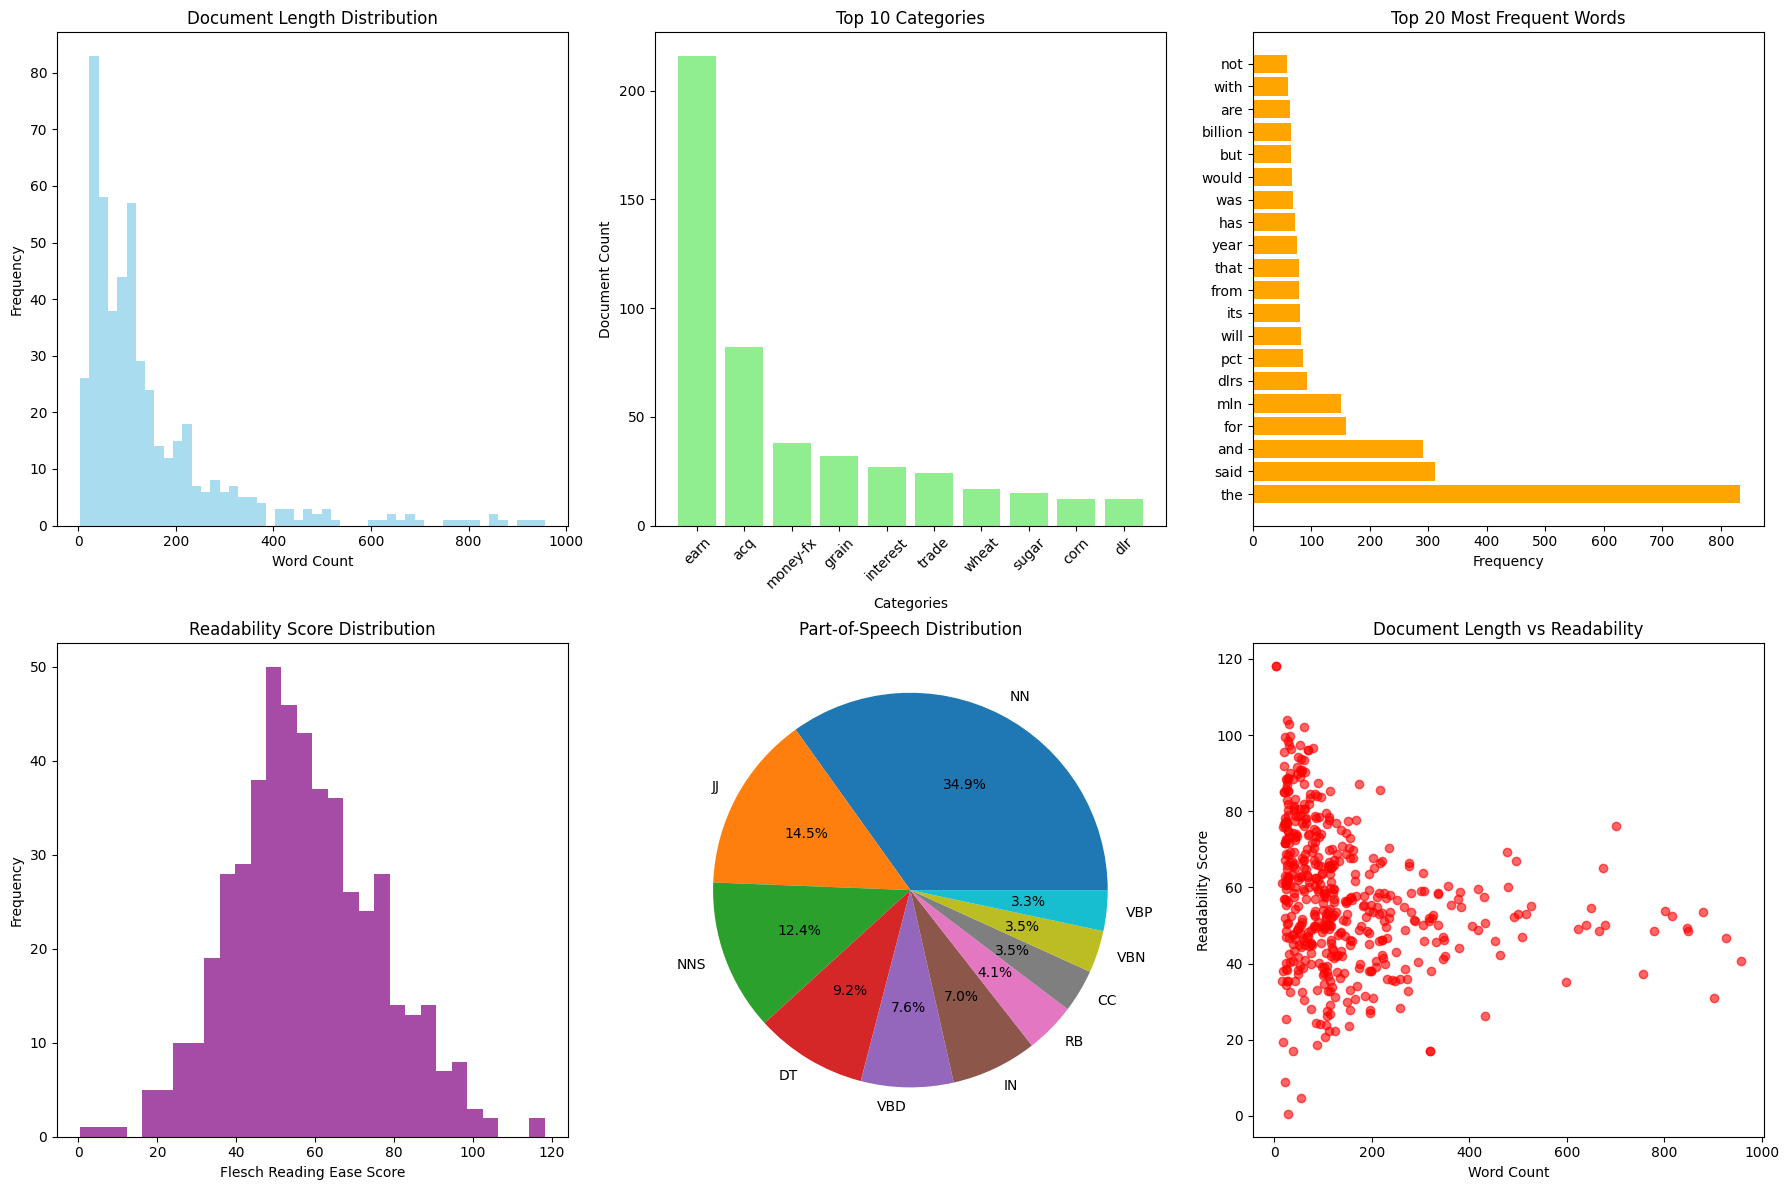

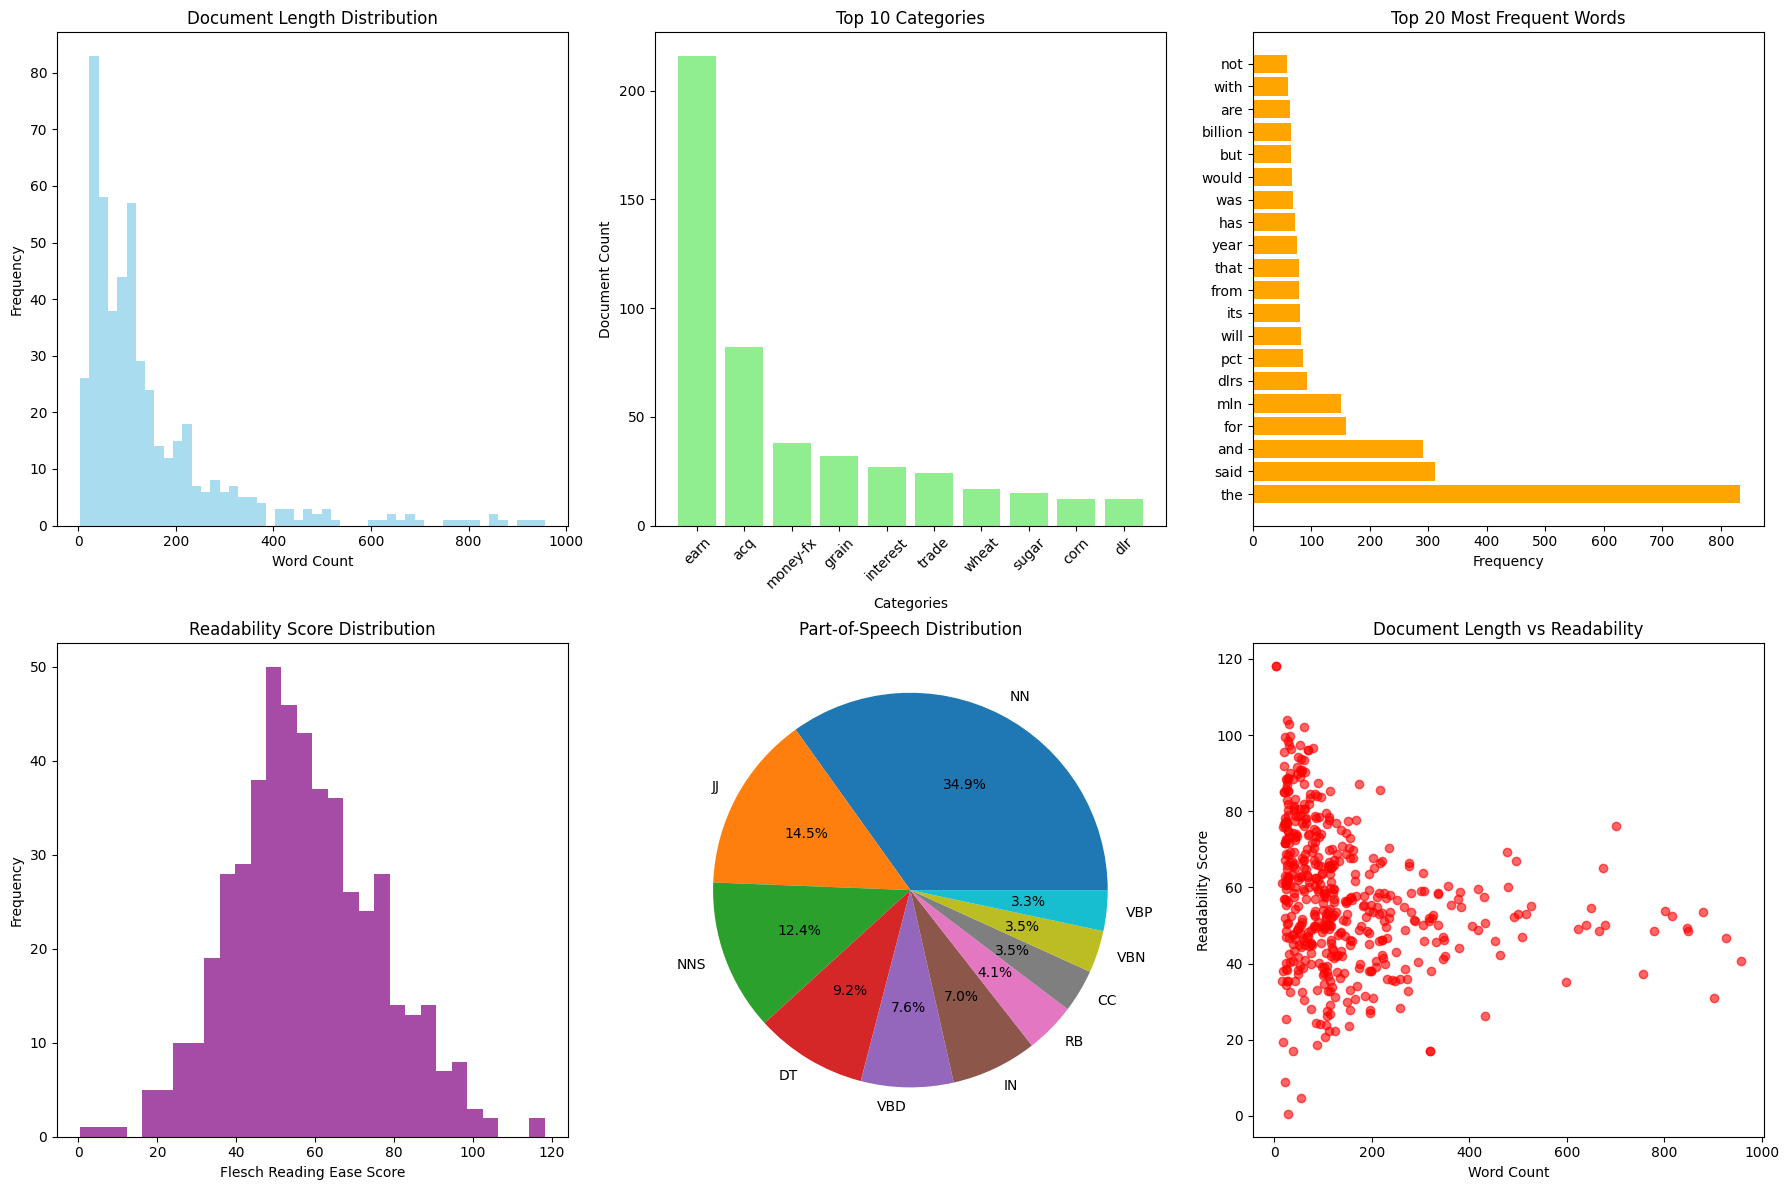

In [4]:
# 1. Comprehensive Reuters Analysis
explorer = ReutersExplorer()
explorer.load_reuters_data(max_docs=500)
report = explorer.generate_comprehensive_report()
explorer.create_visualizations()

# Usecases with sample examples. You can use your own document and run the `EnhancedResearchAgent` based on the below examples.
### I have added 8 different usecase examples on how well the model performs.

In [ ]:
# ============================================================================
# 1. SOCIAL MEDIA MONITORING
# ============================================================================

def social_media_monitoring():
    """
    USE CASE: Monitor social media posts, reviews, and brand mentions
    BUSINESS VALUE: Track brand sentiment, identify trends, and manage reputation
    """
    print("\n📱 SOCIAL MEDIA MONITORING")
    print("=" * 40)
    
    agent = EnhancedResearchAgent()
    extractor = AdvancedInformationExtractor()
    
    # Sample social media posts
    social_posts = {
        "twitter_001": """
        Just tried the new @TechBrand smartphone and I'm blown away! The camera quality is 
        incredible and the battery lasts all day. Definitely worth the upgrade from my old phone. 
        #TechBrand #NewPhone #Amazing
        """,
        
        "facebook_002": """
        Really disappointed with @TechBrand's customer service. I've been waiting 3 weeks for 
        a replacement part and nobody responds to my messages. This is my 4th phone from them 
        and I'm seriously considering switching brands. Not happy at all.
        """,
        
        "instagram_003": """
        Loving the new features in the @TechBrand app update! The dark mode is perfect and 
        the new interface is so much cleaner. Great job to the development team! 
        #AppUpdate #UserExperience #TechBrand
        """,
        
        "reddit_004": """
        PSA: There's a security vulnerability in @TechBrand's latest software update. 
        Multiple users reporting data breaches. I'd recommend avoiding the update until 
        they release a patch. Stay safe everyone!
        """,
        
        "linkedin_005": """
        Congratulations to @TechBrand on their latest product launch! As a long-time industry 
        partner, we're excited to see the innovation and quality improvements. Looking forward 
        to continuing our collaboration.
        """
    }
    
    # Process social media posts
    for post_id, content in social_posts.items():
        agent.add_document(post_id, content)
    
    # Sentiment analysis for brand monitoring
    print("😊 Brand Sentiment Analysis:")
    positive_count = 0
    negative_count = 0
    
    for post_id, content in social_posts.items():
        sentiment = extractor.extract_sentiment_and_emotions(content)
        sentiment_label = sentiment.get('sentiment', {}).get('label', 'Unknown')
        sentiment_score = sentiment.get('sentiment', {}).get('score', 0)
        
        if sentiment_label in ['POSITIVE', 'LABEL_2']:  # Different models may use different labels
            positive_count += 1
        elif sentiment_label in ['NEGATIVE', 'LABEL_0']:
            negative_count += 1
            
        print(f"  {post_id}: {sentiment_label} ({sentiment_score:.3f})")
    
    print(f"\n📊 Brand Sentiment Summary:")
    print(f"  Positive mentions: {positive_count}")
    print(f"  Negative mentions: {negative_count}")
    print(f"  Neutral mentions: {len(social_posts) - positive_count - negative_count}")
    
    # Social media monitoring queries
    social_queries = [
        "What are customers saying about our products?",
        "Are there any complaints or issues mentioned?",
        "What features are customers praising?",
        "Are there any security or technical concerns?"
    ]
    
    print("\n📈 Social Media Analysis Results:")
    for query in social_queries:
        response = agent.multi_modal_reasoning(query)
        print(f"\n🔍 Query: {query}")
        print(f"💬 Answer: {response['answer'][:200]}...")
        
    return agent

social_media_monitoring()


📱 SOCIAL MEDIA MONITORING
🔄 Loading transformer models...


Device set to use cpu
Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cpu
Device set to use cpu


✅ Transformer models loaded successfully
⚠️  Traditional analyzer not available
🔄 Loading transformer models...


Device set to use cpu
Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cpu
Device set to use cpu


✅ Transformer models loaded successfully
📄 Processing document: twitter_001
✅ Document twitter_001 processed successfully
📄 Processing document: facebook_002
✅ Document facebook_002 processed successfully
📄 Processing document: instagram_003
✅ Document instagram_003 processed successfully
📄 Processing document: reddit_004
✅ Document reddit_004 processed successfully
📄 Processing document: linkedin_005
✅ Document linkedin_005 processed successfully
😊 Brand Sentiment Analysis:
  twitter_001: positive (0.985)
  facebook_002: negative (0.941)
  instagram_003: positive (0.984)
  reddit_004: negative (0.734)
  linkedin_005: positive (0.985)

📊 Brand Sentiment Summary:
  Positive mentions: 0
  Negative mentions: 0
  Neutral mentions: 5

📈 Social Media Analysis Results:
🧠 Multi-modal reasoning for: What are customers saying about our products?

🔍 Query: What are customers saying about our products?
💬 Answer: Based on multi-modal analysis:

Document linkedin_005: TechBrand is a long-time indust

In [6]:
# ============================================================================
# 2. NEWS MONITORING & TREND ANALYSIS
# ============================================================================

def news_monitoring():
    """
    USE CASE: Monitor news articles, identify trends, and track industry developments
    BUSINESS VALUE: Stay informed about market changes, opportunities, and risks
    """
    print("\n📰 NEWS MONITORING & TREND ANALYSIS")
    print("=" * 40)
    
    agent = EnhancedResearchAgent()
    extractor = AdvancedInformationExtractor()
    
    # Sample news articles
    news_articles = {
        "tech_regulation": """
        European Union lawmakers approved new AI regulation framework requiring transparency 
        in algorithmic decision-making. The legislation affects all AI systems used in the EU 
        and includes penalties up to 4% of annual revenue for non-compliance. Tech companies 
        have 24 months to implement required changes. Industry experts predict significant 
        impact on AI development and deployment strategies.
        """,
        
        "market_volatility": """
        Stock markets experienced significant volatility following Federal Reserve comments 
        on interest rate policy. The S&P 500 dropped 2.5% in early trading before recovering 
        to close down 0.8%. Technology stocks led the decline with Apple falling 3.2% and 
        Microsoft down 2.8%. Bond yields rose to 4.8% on expectations of continued rate increases.
        """,
        
        "innovation_breakthrough": """
        Research team at Stanford University achieved breakthrough in quantum computing 
        error correction. The new method reduces error rates by 90% compared to current 
        techniques. Commercial applications could emerge within 5-7 years according to 
        lead researchers. Technology giants including IBM and Google have expressed 
        interest in licensing the innovation.
        """
    }
    
    # Process news articles
    for article_id, content in news_articles.items():
        agent.add_document(article_id, content)
    
    # Extract key information from news
    print("📈 News Information Extraction:")
    for article_id, content in news_articles.items():
        # Classify article type
        doc_types = ['regulatory', 'financial', 'technology', 'political', 'economic']
        classification = extractor.zero_shot_classification(content, doc_types)
        
        print(f"  {article_id}:")
        print(f"    Type: {classification.get('predicted_label', 'Unknown')}")
        print(f"    Confidence: {classification.get('confidence', 0):.3f}")
    
    # News monitoring queries
    news_queries = [
        "What regulatory changes are affecting our industry?",
        "What market trends should we be aware of?",
        "What technological breakthroughs are happening?",
        "What economic factors might impact our business?"
    ]
    
    print("\n📊 News Analysis Results:")
    for query in news_queries:
        response = agent.multi_modal_reasoning(query)
        print(f"\n🔍 Query: {query}")
        print(f"📰 Answer: {response['answer'][:200]}...")
        
    return agent

news_monitoring()


📰 NEWS MONITORING & TREND ANALYSIS
🔄 Loading transformer models...


Device set to use cpu
Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cpu
Device set to use cpu


✅ Transformer models loaded successfully
⚠️  Traditional analyzer not available
🔄 Loading transformer models...


Device set to use cpu
Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cpu
Device set to use cpu


✅ Transformer models loaded successfully
📄 Processing document: tech_regulation
✅ Document tech_regulation processed successfully
📄 Processing document: market_volatility
✅ Document market_volatility processed successfully
📄 Processing document: innovation_breakthrough
✅ Document innovation_breakthrough processed successfully
📈 News Information Extraction:
  tech_regulation:
    Type: regulatory
    Confidence: 0.679
  market_volatility:
    Type: technology
    Confidence: 0.759
  innovation_breakthrough:
    Type: technology
    Confidence: 0.800

📊 News Analysis Results:
🧠 Multi-modal reasoning for: What regulatory changes are affecting our industry?

🔍 Query: What regulatory changes are affecting our industry?
📰 Answer: Based on multi-modal analysis:

Document tech_regulation: EU lawmakers approved new AI regulation framework requiring transparency. The legislation affects all AI systems used in the EU. Tech companie...
🧠 Multi-modal reasoning for: What market trends should we be a

In [7]:
# ============================================================================
# 3. PRODUCT REVIEW ANALYSIS
# ============================================================================

def product_review_analysis():
    """
    USE CASE: Analyze customer reviews, ratings, and product feedback
    BUSINESS VALUE: Understand customer satisfaction, identify issues, and improve products
    """
    print("\n⭐ PRODUCT REVIEW ANALYSIS")
    print("=" * 40)
    
    agent = EnhancedResearchAgent()
    extractor = AdvancedInformationExtractor()
    
    # Sample product reviews
    product_reviews = {
        "review_001": """
        ⭐⭐⭐⭐⭐ Amazing product! I've been using this for 3 months and it's completely 
        transformed my workflow. The interface is intuitive and the customer support is 
        excellent. Battery life is outstanding - easily lasts 2 days with heavy use. 
        Highly recommend to anyone looking for a reliable solution.
        """,
        
        "review_002": """
        ⭐⭐ Disappointed with this purchase. The product arrived damaged and customer service 
        took 2 weeks to respond. When it works, it's okay, but there are frequent crashes 
        and the battery drains quickly. For the price, I expected much better quality. 
        Would not recommend to others.
        """,
        
        "review_003": """
        ⭐⭐⭐⭐ Good value for money. Setup was straightforward and most features work as 
        advertised. The only complaint is that the app could be more user-friendly - 
        some functions are hard to find. Overall satisfied with the purchase and would 
        consider buying again.
        """,
        
        "review_004": """
        ⭐⭐⭐⭐⭐ Exceeded expectations! The build quality is excellent and the performance 
        is smooth. I particularly love the new AI features - they save so much time. 
        The company clearly listens to customer feedback based on the recent updates. 
        Best purchase I've made this year.
        """,
        
        "review_005": """
        ⭐⭐⭐ Mixed feelings about this product. The hardware is solid but the software 
        needs work. There are useful features but also some bugs that need fixing. 
        Customer support is responsive but solutions take time to implement. 
        Average product with room for improvement.
        """
    }
    
    # Process product reviews
    for review_id, content in product_reviews.items():
        agent.add_document(review_id, content)
    
    # Analyze review sentiment and extract insights
    print("⭐ Review Sentiment Analysis:")
    sentiment_scores = []
    
    for review_id, content in product_reviews.items():
        sentiment = extractor.extract_sentiment_and_emotions(content)
        sentiment_label = sentiment.get('sentiment', {}).get('label', 'Unknown')
        sentiment_score = sentiment.get('sentiment', {}).get('score', 0)
        sentiment_scores.append(sentiment_score)
        
        print(f"  {review_id}: {sentiment_label} ({sentiment_score:.3f})")
    
    avg_sentiment = sum(sentiment_scores) / len(sentiment_scores) if sentiment_scores else 0
    print(f"\n📊 Average Sentiment Score: {avg_sentiment:.3f}")
    
    # Product review analysis queries
    review_queries = [
        "What features do customers like most?",
        "What are the main complaints or issues?",
        "How is the customer service performing?",
        "What improvements should we prioritize?"
    ]
    
    print("\n📈 Review Analysis Results:")
    for query in review_queries:
        response = agent.multi_modal_reasoning(query)
        print(f"\n🔍 Query: {query}")
        print(f"💬 Answer: {response['answer'][:200]}...")
        
    return agent

product_review_analysis()


⭐ PRODUCT REVIEW ANALYSIS
🔄 Loading transformer models...


Device set to use cpu
Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cpu
Device set to use cpu


✅ Transformer models loaded successfully
⚠️  Traditional analyzer not available
🔄 Loading transformer models...


Device set to use cpu
Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cpu
Device set to use cpu


✅ Transformer models loaded successfully
📄 Processing document: review_001
✅ Document review_001 processed successfully
📄 Processing document: review_002
✅ Document review_002 processed successfully
📄 Processing document: review_003
✅ Document review_003 processed successfully
📄 Processing document: review_004
✅ Document review_004 processed successfully
📄 Processing document: review_005
✅ Document review_005 processed successfully
⭐ Review Sentiment Analysis:
  review_001: positive (0.980)
  review_002: negative (0.925)
  review_003: positive (0.843)
  review_004: positive (0.982)
  review_005: negative (0.720)

📊 Average Sentiment Score: 0.890

📈 Review Analysis Results:
🧠 Multi-modal reasoning for: What features do customers like most?

🔍 Query: What features do customers like most?
💬 Answer: Based on multi-modal analysis:

Document review_005: Mixed feelings about this product. There are useful features but also some bugs that need fixing. Customer support is responsive but solutio

In [ ]:
# ============================================================================
# 4. COMPETITIVE INTELLIGENCE
# ============================================================================

def competitive_intelligence():
    """
    USE CASE: Monitor competitor activities, press releases, and market positioning
    BUSINESS VALUE: Identify competitive threats, opportunities, and market trends
    """
    print("\n🏆 COMPETITIVE INTELLIGENCE")
    print("=" * 40)
    
    agent = EnhancedResearchAgent()
    
    # Sample competitor intelligence
    competitor_docs = {
        "competitor_a_launch": """
        Competitor A announced their new AI-powered productivity suite at the annual tech conference. 
        The product features advanced machine learning capabilities and integrates with 50+ 
        third-party applications. Pricing starts at $29/month per user with enterprise discounts 
        available. The company expects to capture 15% market share within 18 months. 
        Beta testing begins next month with general availability in Q3 2024.
        """,
        
        "competitor_b_funding": """
        Competitor B raised $75 million in Series C funding led by Venture Capital Partners. 
        The funding will support international expansion and R&D investments. The company 
        plans to hire 200 engineers and open offices in London and Tokyo. Current valuation 
        is $500 million, representing 3x growth from their last funding round. 
        CEO stated focus on AI and cloud infrastructure technologies.
        """,
        
        "competitor_c_partnership": """
        Competitor C announced strategic partnership with Global Tech Corp to develop 
        next-generation cloud solutions. The collaboration includes joint research initiatives 
        and shared go-to-market strategies. Combined customer base exceeds 50,000 enterprises. 
        Partnership expected to generate $200 million in additional revenue over 2 years. 
        Integration timeline spans 12 months with early access for select customers.
        """
    }
    
    # Process competitive intelligence
    for doc_id, content in competitor_docs.items():
        agent.add_document(doc_id, content)
    
    # Competitive analysis queries
    competitive_queries = [
        "What new products are competitors launching?",
        "What are competitor pricing strategies?",
        "What partnerships are being formed?",
        "What funding and investment activities are happening?"
    ]
    
    print("🔍 Competitive Analysis Results:")
    for query in competitive_queries:
        response = agent.multi_modal_reasoning(query)
        print(f"\n🔍 Query: {query}")
        print(f"📊 Answer: {response['answer'][:200]}...")
        
    return agent

competitive_intelligence()


🏆 COMPETITIVE INTELLIGENCE
🔄 Loading transformer models...


Device set to use cpu
Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cpu
Device set to use cpu


✅ Transformer models loaded successfully
⚠️  Traditional analyzer not available
📄 Processing document: competitor_a_launch
✅ Document competitor_a_launch processed successfully
📄 Processing document: competitor_b_funding
✅ Document competitor_b_funding processed successfully
📄 Processing document: competitor_c_partnership
✅ Document competitor_c_partnership processed successfully
🔍 Competitive Analysis Results:
🧠 Multi-modal reasoning for: What new products are competitors launching?

🔍 Query: What new products are competitors launching?
📊 Answer: Based on multi-modal analysis:

Document competitor_b_funding: Competitor B raised $75 million in Series C funding led by Venture Capital Partners. The company plans to hire 200 engineers and open off...
🧠 Multi-modal reasoning for: What are competitor pricing strategies?

🔍 Query: What are competitor pricing strategies?
📊 Answer: Based on multi-modal analysis:

Document competitor_b_funding: Competitor B raised $75 million in Series C fundin

In [6]:
# ============================================================================
# 5. CUSTOMER SUPPORT ANALYSIS
# ============================================================================

def customer_support_analysis():
    """
    USE CASE: Analyze customer support tickets, complaints, and feedback
    BUSINESS VALUE: Identify common issues, sentiment trends, and improvement areas
    """
    print("\n🎧 CUSTOMER SUPPORT ANALYSIS")
    print("=" * 40)
    
    agent = EnhancedResearchAgent()
    extractor = AdvancedInformationExtractor()
    
    # Sample customer support tickets
    support_tickets = {
        "ticket_001": """
        Subject: App crashes when uploading photos
        I've been trying to upload photos from my camera roll for the past 3 days, but the app 
        keeps crashing. This is extremely frustrating as I need to share important documents 
        with my team. I've tried restarting the app and my phone, but nothing works. 
        Please fix this ASAP!
        """,
        
        "ticket_002": """
        Subject: Payment processing issues
        My payment was declined twice even though I have sufficient funds. The error message 
        says 'Payment failed - please try again' but doesn't explain why. I've been a loyal 
        customer for 3 years and this is unacceptable. I need this resolved immediately 
        or I'll switch to a competitor.
        """,
        
        "ticket_003": """
        Subject: Great new feature!
        I wanted to reach out and say how much I love the new dark mode feature. It's 
        exactly what I was hoping for and makes using the app at night so much better. 
        The team did an amazing job with this update. Keep up the excellent work!
        """,
        
        "ticket_004": """
        Subject: Login problems after update
        Since the last update, I can't log into my account. I keep getting 'Invalid credentials' 
        even though I'm using the correct username and password. I've tried resetting my 
        password multiple times but still can't access my account. This is affecting my work.
        """
    }
    
    # Process support tickets
    for ticket_id, content in support_tickets.items():
        agent.add_document(ticket_id, content)
    
    # Analyze sentiment for each ticket
    print("😊 Sentiment Analysis Results:")
    for ticket_id, content in support_tickets.items():
        sentiment = extractor.extract_sentiment_and_emotions(content)
        print(f"  {ticket_id}: {sentiment.get('sentiment', {}).get('label', 'Unknown')} "
              f"({sentiment.get('sentiment', {}).get('score', 0):.3f})")
    
    # Customer support analysis queries
    support_queries = [
        "What are the main technical issues customers are facing?",
        "How many customers are having payment problems?",
        "What features are customers praising?",
        "Which issues require immediate attention?"
    ]
    
    print("\n📋 Support Analysis Results:")
    for query in support_queries:
        response = agent.multi_modal_reasoning(query)
        print(f"\n🔍 Query: {query}")
        print(f"💬 Answer: {response['answer'][:200]}...")
        
    return agent

customer_support_analysis()


🎧 CUSTOMER SUPPORT ANALYSIS
🔄 Loading transformer models...


Device set to use cpu
Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cpu
Device set to use cpu


✅ Transformer models loaded successfully
⚠️  Traditional analyzer not available
🔄 Loading transformer models...


Device set to use cpu
Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cpu
Device set to use cpu


✅ Transformer models loaded successfully
📄 Processing document: ticket_001
✅ Document ticket_001 processed successfully
📄 Processing document: ticket_002
✅ Document ticket_002 processed successfully
📄 Processing document: ticket_003
✅ Document ticket_003 processed successfully
📄 Processing document: ticket_004
✅ Document ticket_004 processed successfully
😊 Sentiment Analysis Results:
  ticket_001: negative (0.757)
  ticket_002: negative (0.849)
  ticket_003: positive (0.982)
  ticket_004: negative (0.821)

📋 Support Analysis Results:
🧠 Multi-modal reasoning for: What are the main technical issues customers are facing?

🔍 Query: What are the main technical issues customers are facing?
💬 Answer: Based on multi-modal analysis:

Document ticket_002: My payment was declined twice even though I have sufficient funds. The error message  says 'Payment failed - please try again' but doesn't explain ...
🧠 Multi-modal reasoning for: How many customers are having payment problems?

🔍 Query: How ma

In [5]:
# ============================================================================
# 6. FINANCIAL DOCUMENT ANALYSIS
# ============================================================================

def financial_analysis_use_case():
    """
    USE CASE: Analyze financial documents, earnings reports, and market news
    BUSINESS VALUE: Extract key metrics, sentiment, and insights from financial data
    """
    print("💰 FINANCIAL DOCUMENT ANALYSIS")
    print("=" * 40)
    
    agent = EnhancedResearchAgent()
    
    # Sample financial documents
    financial_docs = {
        "apple_q1": """
        Apple Inc. reported record first-quarter revenue of $117.2 billion, up 11% year-over-year, 
        driven by strong iPhone sales and services growth. The company generated $34.6 billion in 
        profit, exceeding analyst expectations. CEO Tim Cook announced plans to invest $430 billion 
        in U.S. operations over the next five years. Apple's stock price surged 8% in after-hours 
        trading following the earnings announcement on January 27, 2024.
        """,
        
        "tesla_delivery": """
        Tesla delivered 484,507 vehicles in Q4 2023, falling short of Wall Street estimates of 
        500,000 units. Despite the miss, annual deliveries reached 1.81 million vehicles, 
        representing 35% growth year-over-year. The company cited supply chain challenges and 
        factory shutdowns in China as key factors. Tesla's stock declined 3.5% in pre-market 
        trading following the delivery report.
        """,
        
        "fed_decision": """
        The Federal Reserve raised interest rates by 0.25% to 5.25-5.5%, the highest level in 
        22 years. Fed Chairman Jerome Powell indicated this could be the final rate hike of the 
        current cycle, citing cooling inflation and economic uncertainty. The decision was 
        unanimous among voting members. Bond yields fell and stock markets rallied on the news, 
        with the S&P 500 gaining 1.8%.
        """
    }
    
    # Process financial documents
    for doc_id, content in financial_docs.items():
        agent.add_document(doc_id, content)
    
    # Financial analysis queries
    financial_queries = [
        "What are the key revenue figures mentioned?",
        "How are different companies performing financially?",
        "What economic factors are affecting markets?",
        "What is the market sentiment in these reports?"
    ]
    
    print("📊 Financial Analysis Results:")
    for query in financial_queries:
        response = agent.multi_modal_reasoning(query)
        print(f"\n🔍 Query: {query}")
        print(f"📈 Answer: {response['answer'][:200]}...")
        print(f"🎯 Confidence: {response['confidence']:.2f}")
    
    return agent

financial_analysis_use_case()

💰 FINANCIAL DOCUMENT ANALYSIS
🔄 Loading transformer models...


Device set to use cpu
Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cpu
Device set to use cpu


✅ Transformer models loaded successfully
⚠️  Traditional analyzer not available
📄 Processing document: apple_q1
✅ Document apple_q1 processed successfully
📄 Processing document: tesla_delivery
✅ Document tesla_delivery processed successfully
📄 Processing document: fed_decision
✅ Document fed_decision processed successfully
📊 Financial Analysis Results:
🧠 Multi-modal reasoning for: What are the key revenue figures mentioned?

🔍 Query: What are the key revenue figures mentioned?
📈 Answer: Based on multi-modal analysis:

Document apple_q1: Apple reported record first-quarter revenue of $117.2 billion, up 11% year-over-year. The company generated $34.6 billion in profit, exceeding analys...
🎯 Confidence: 0.60
🧠 Multi-modal reasoning for: How are different companies performing financially?

🔍 Query: How are different companies performing financially?
📈 Answer: Based on multi-modal analysis:

Document apple_q1: Apple reported record first-quarter revenue of $117.2 billion, up 11% year-over-y

In [ ]:
# ============================================================================
# 7. ACADEMIC RESEARCH ASSISTANT
# ============================================================================

def academic_research_assistant():
    """
    USE CASE: Analyze research papers, abstracts, and academic literature
    BUSINESS VALUE: Extract key findings, methodologies, and research trends
    """
    print("\n🎓 ACADEMIC RESEARCH ASSISTANT")
    print("=" * 40)
    
    agent = EnhancedResearchAgent()
    
    # Sample research abstracts
    research_papers = {
        "ml_healthcare": """
        This study presents a comprehensive analysis of machine learning applications in healthcare 
        diagnosis. We evaluated 15 different ML algorithms across 3 medical domains: radiology, 
        pathology, and cardiology. Our results show that deep learning models achieved 94.2% 
        accuracy in medical image classification, significantly outperforming traditional methods. 
        The research involved 10,000 patient records and was validated across 5 hospitals. 
        Key findings include the importance of data quality and the need for domain-specific 
        feature engineering.
        """,
        
        "nlp_sentiment": """
        We propose a novel approach to sentiment analysis using transformer-based models with 
        attention mechanisms. Our methodology combines BERT embeddings with custom classification 
        layers, achieving state-of-the-art performance on 4 benchmark datasets. The model 
        demonstrates 96.7% accuracy on movie reviews and 92.3% on social media posts. 
        We also introduce a new evaluation metric for measuring sentiment intensity. 
        The research contributes to understanding emotional nuances in text data.
        """,
        
        "climate_modeling": """
        This paper examines the impact of machine learning on climate change prediction models. 
        We analyzed 20 years of climate data using ensemble methods and deep neural networks. 
        Our findings indicate that AI-enhanced models can predict temperature changes with 
        15% higher accuracy than traditional statistical approaches. The study covers 
        50 global weather stations and incorporates satellite data. Results suggest 
        significant improvements in long-term climate forecasting capabilities.
        """
    }
    
    # Process research papers
    for paper_id, content in research_papers.items():
        agent.add_document(paper_id, content)
    
    # Research analysis queries
    research_queries = [
        "What machine learning techniques are being used?",
        "What accuracy rates are being achieved?",
        "What datasets are researchers working with?",
        "What are the key findings across these studies?"
    ]
    
    print("🔬 Research Analysis Results:")
    for query in research_queries:
        response = agent.multi_modal_reasoning(query)
        print(f"\n🔍 Query: {query}")
        print(f"📚 Answer: {response['answer'][:200]}...")
        
    return agent

academic_research_assistant()


🎓 ACADEMIC RESEARCH ASSISTANT
🔄 Loading transformer models...


Device set to use cpu
Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cpu
Device set to use cpu


✅ Transformer models loaded successfully
⚠️  Traditional analyzer not available
📄 Processing document: ml_healthcare
✅ Document ml_healthcare processed successfully
📄 Processing document: nlp_sentiment
✅ Document nlp_sentiment processed successfully
📄 Processing document: climate_modeling
✅ Document climate_modeling processed successfully
🔬 Research Analysis Results:
🧠 Multi-modal reasoning for: What machine learning techniques are being used?

🔍 Query: What machine learning techniques are being used?
📚 Answer: Based on multi-modal analysis:

Document ml_healthcare: Deep learning models achieved 94.2% accuracy in medical image classification. Research involved 10,000 patient records and was validated across ...
🧠 Multi-modal reasoning for: What accuracy rates are being achieved?

🔍 Query: What accuracy rates are being achieved?
📚 Answer: Based on multi-modal analysis:

Document ml_healthcare: Deep learning models achieved 94.2% accuracy in medical image classification. Research involve

In [ ]:
# ============================================================================
# 8. MEDICAL DOCUMENT ANALYSIS
# ============================================================================

def medical_document_analysis():
    """
    USE CASE: Analyze medical reports, research papers, and clinical trial data
    BUSINESS VALUE: Extract medical insights, track research progress, and support healthcare decisions
    """
    print("\n🏥 MEDICAL DOCUMENT ANALYSIS")
    print("=" * 40)
    
    agent = EnhancedResearchAgent()
    extractor = AdvancedInformationExtractor()
    
    # Sample medical documents (anonymized/fictional)
    medical_docs = {
        "clinical_trial": """
        Phase III clinical trial results for Novel Drug X in treating Type 2 diabetes. 
        Study included 1,247 patients across 15 medical centers over 18 months. 
        Primary endpoint: HbA1c reduction of 1.2% compared to placebo (p<0.001). 
        Secondary endpoints: weight loss of 3.5kg average, improved insulin sensitivity. 
        Adverse events: mild gastrointestinal symptoms in 12% of patients. 
        Efficacy demonstrated across all demographic groups.
        """,
        
        "research_paper": """
        Systematic review of machine learning applications in radiology imaging. 
        Analysis of 45 studies covering chest X-rays, MRI, and CT scans. 
        Deep learning models achieved 95.2% accuracy in pneumonia detection, 
        92.8% in tumor identification, and 89.5% in fracture diagnosis. 
        Key finding: AI-assisted diagnosis reduces radiologist workload by 40% 
        while maintaining diagnostic accuracy.
        """,
        
        "patient_outcomes": """
        Quarterly patient outcomes report for Cardiovascular Department. 
        Total procedures: 856 (15% increase from previous quarter). 
        30-day readmission rate: 4.2% (below national average of 6.1%). 
        Patient satisfaction score: 4.7/5.0. Average length of stay: 3.2 days. 
        Mortality rate: 0.8% (within expected range). 
        Top procedures: cardiac catheterization (45%), bypass surgery (23%).
        """
    }
    
    # Process medical documents
    for doc_id, content in medical_docs.items():
        agent.add_document(doc_id, content)
    
    # Extract medical metrics
    print("🏥 Medical Information Extraction:")
    for doc_id, content in medical_docs.items():
        # Extract percentages and numbers (medical metrics)
        financial = extractor.extract_financial_metrics(content)
        print(f"  {doc_id}:")
        print(f"    Percentages: {financial.get('percentages', [])}")
    
    # Medical analysis queries
    medical_queries = [
        "What are the key clinical trial results?",
        "How accurate are the AI diagnostic tools?",
        "What patient outcomes are being reported?",
        "What medical procedures are most common?"
    ]
    
    print("\n🔬 Medical Analysis Results:")
    for query in medical_queries:
        response = agent.multi_modal_reasoning(query)
        print(f"\n🔍 Query: {query}")
        print(f"🏥 Answer: {response['answer'][:200]}...")
        
    return agent

medical_document_analysis()